<a href="https://colab.research.google.com/github/jiin124/MachineLearning/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
!wget http://bit.ly/fruits_300 -O fruits_300.npy
import numpy as np
fruits=np.load('fruits_300.npy')
fruits_2d=fruits.reshape(-1,100*100)

--2021-03-11 16:29:38--  http://bit.ly/fruits_300
Resolving bit.ly (bit.ly)... 67.199.248.11, 67.199.248.10
Connecting to bit.ly (bit.ly)|67.199.248.11|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy [following]
--2021-03-11 16:29:39--  https://github.com/rickiepark/hongong-ml/raw/master/fruits_300.npy
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy [following]
--2021-03-11 16:29:39--  https://raw.githubusercontent.com/rickiepark/hongong-ml/master/fruits_300.npy
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... 

넘파이 배열로 적재하고, 
사이킷런은 sklearn.decomposition 모듈 아래 PCA 클래스로 주성분 분석 알고리즘을 제공한다. PCA 클래스의 객체를 만들 때 n_component 매개변수에 주성분의 개수를 지정해줘야한다. K- 평균 과 마찬가지이므로 비지도 학습이기때문에 fit() 타깃값을 제공하지 않는다.

In [28]:
from sklearn.decomposition import PCA
pca=PCA(n_components=50)
pca.fit(fruits_2d)

PCA(copy=True, iterated_power='auto', n_components=50, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [29]:
print(pca.components_.shape)

(50, 10000)


In [30]:
import matplotlib.pyplot as plt
def draw_fruits(arr,ratio=1):
  n=len(arr)
  rows=int(np.ceil(n/10))
  cols=n if rows<2 else 10
  fig,axs=plt.subplots(rows,cols,figsize=(cols*ratio,rows*ratio),squeeze=False)

  for i in range(rows):
    for j in range(cols):
      if i*10+j<n:
        axs[i,j].imshow(arr[i*10+j],cmap='gray_r')
      axs[i,j].axis('off')
  plt.show()

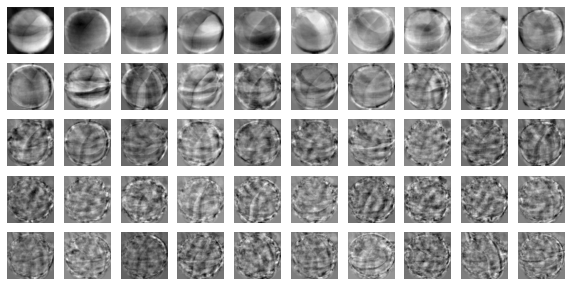

In [31]:
draw_fruits(pca.components_.reshape(-1,100,100))

n_components=50 으로 지정해씩 때문에 pca.components_ 배열의 첫번째 차원이 50이다. 즉 50개의 주성분을 찾은 것이다. 두번재 차원은 항상 원본 데이터의 특성 개수와 같은 10000개이다. 

주성분을 찾았으니까. 원본데이터를 주성분에 투영하여 특성의 개수를 10000개에서 50개로 줄일 수 있다. PCA의 transform 메서드를 사용해 원본데이터의 차원을 50으로 줄여보자

In [32]:
print(fruits_2d.shape)

(300, 10000)


In [33]:
fruits_pca=pca.transform(fruits_2d)
print(fruits_pca.shape)

(300, 50)


## 원본 데이터 재구성

앞에서 10000개의 특성을 50개로 줄였다. 이로인해 어느정도 손실이 발생할 수 밖에 없다. 하지만 최대한 분산이 큰 방향으로 데이터를 투영해씩 때문에 원본 데이터를 상당 부분 재구성할 수 있다. 

In [34]:
fruits_inverse=pca.inverse_transform(fruits_pca)
print(fruits_inverse.shape)

(300, 10000)


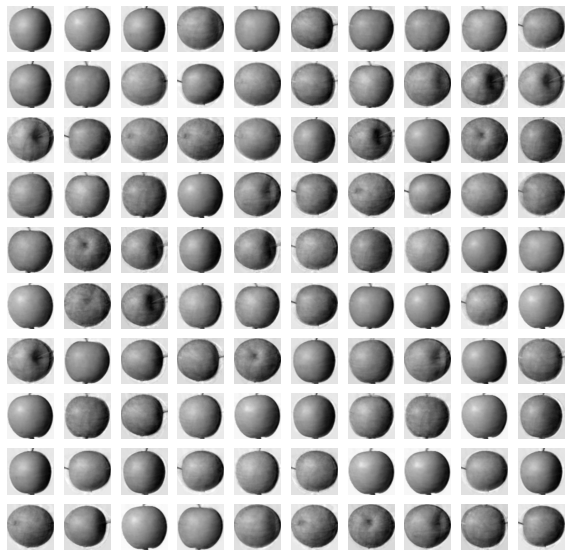

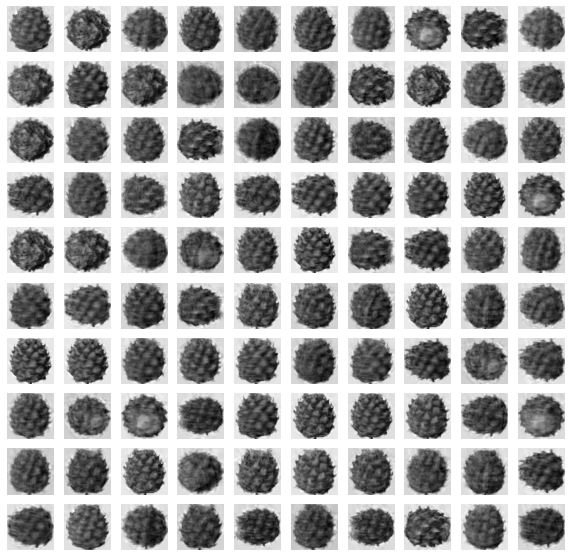

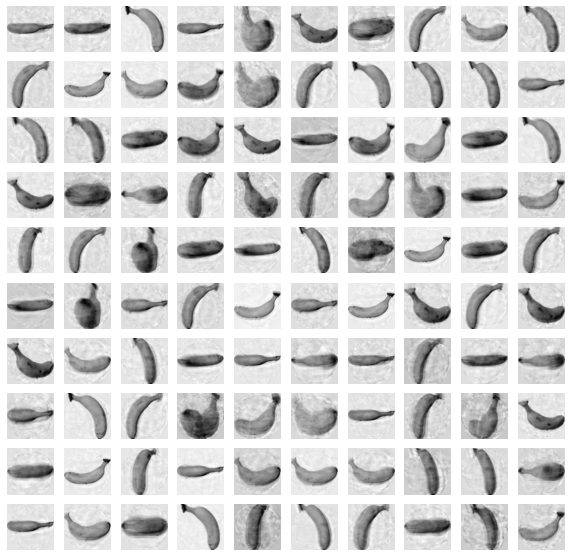

In [35]:
fruits_reconstruct=fruits_inverse.reshape(-1,100,100)
for start in [0,100,200]:
  draw_fruits(fruits_reconstruct[start:start+100])
  print("\n")

앞서 50개의 차원으로 축소한 fruits_pca 데이터를 전달해 10000개의 특성을 복원했다. 예상대로 10000개의 특성이 복원되었다. 이 데이터를 100*100크기로 바꾸어 출력했다. 

거의 모든 과일이 복원되었다. 일부 흐리고 번졌지만 불과 50개의 특성을 10000개로 늘린것은 잘된거라고 말할 수 있다. 

## 설명된 분산

주성분이 원본 데이터의 분산을 얼마나 잘 나타내는지 기록한 값을 설명된 분산이라고 한다. PCA 클래스의 explained_variance_ratio_에 각 주성분의 설명된 분산 비율이 기록되어있다. 
첫번째 주성분의 설명된 분산이 가장 큰다. 이 분산 비율을 모두 더하면 50개의 주성분으로 표현하고 있는 총분산 비율을 얻을 수 있다. 

In [36]:
print(np.sum(pca.explained_variance_ratio_))

0.9215458370157218


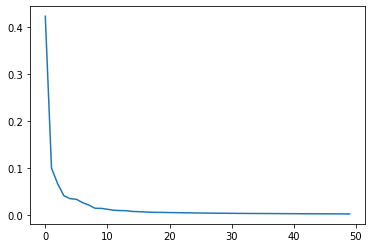

In [37]:
plt.plot(pca.explained_variance_ratio_)
plt.show()

## 다른 알고리즘과 함께 사용하기

과일사진 원본데이터와 pca 로 축소한 데이터를 지도 학습에 적용해보고 어떤 차이가 있는지 보자, 3개의 과일 사진을 분류해야하므로 간단히 로지스틱 회귀를 사용해볼 것이다. 먼저 사이킷런의 LogisticRegression 모델을 만든다. 

In [38]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

지도학습 모델을 사용하려면 타깃값이 있어야 한다. 여기서 사과를 0, 파인애플을 1 , 바나나를 2로 지정하겠다. 

In [39]:
target=np.array([0]*100+[1]*100+[2]*100)

In [40]:
from sklearn.model_selection import cross_validate
scores=cross_validate(lr,fruits_2d,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

0.9966666666666667
1.7332529544830322


교차검증의 점수는 0.997 정도로 매우 높다. 특성이 10000개나 되기 떄문에 300개의 샘플에서는 금방 과대 적합된 모델을 만들기 쉽다. cross_validate()함수가 반환하는 딕셔너리에서는 fir_time 항목에 각 교차 검증 포르의 훈련시간이 기록되어있다. 1.7초정도 걸렸다. 
이제 이 값을 PCA로 축소한 fruits_pca 를 사용했을 떄와 비교하겠다.

In [41]:
scores=cross_validate(lr,fruits_pca,target)
print(np.mean(scores['test_score']))
print(np.mean(scores['fit_time']))

1.0
0.03357009887695313
